In [ ]:
import numpy as np
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
import glob
import cv2
import matplotlib.pyplot as plt

In [ ]:
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize
from matplotlib import image as mpimg
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
from typing import List
import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def display_images(image1, image2):
    fig, axes = plt.subplots(1, 2, figsize=(5, 5))
    
    axes[0].imshow(image1)
    axes[0].axis('off')
    
    axes[1].imshow(image2)
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

In [ ]:
def scale_images(images, new_shape):
    images_list = list()
    for image in images:
        new_image = resize(image, new_shape)
        images_list.append(new_image)
    return asarray(images_list)

In [ ]:
def calculate_fid(mod, images1, images2, real, generated):
 act1 = mod.predict(images1)
 act2 = mod.predict(images2)
 mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
 mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
 ssdiff = numpy.sum((mu1 - mu2)**2.0)
 covmean = sqrtm(sigma1.dot(sigma2))
 if iscomplexobj(covmean):
        covmean = covmean.real
 fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
 print("FID SCORE FOR REAL AND GENERATED IMAGE IS: ")
 print("%.2f" % fid)
 display_images(real, generated)

Prepared (505, 511, 4) (510, 507, 4)
Scaled (505, 256, 256, 3) (510, 256, 256, 3)
16/16 [==============================] - 80s 5s/step
FID SCORE FOR REAL AND GENERATED IMAGE IS: 
0.17


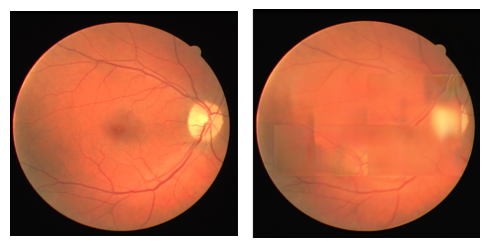

In [ ]:
#FOR FID COMPUTATION
images1 = mpimg.imread("/content/drive/MyDrive/testing/1_2.png")
images2 = mpimg.imread("/content/drive/MyDrive/testing/1_1.png")
real = mpimg.imread("/content/drive/MyDrive/testing/1_2.png")
generated = mpimg.imread("/content/drive/MyDrive/testing/1_1.png")
print('Prepared', images1.shape, images2.shape)
images1 = numpy.array(images1.astype('float32'))
images2 = numpy.array(images2.astype('float32'))
images1 = scale_images(images1, (256,256,3))
images2 = scale_images(images2, (256,256,3))
print('Scaled', images1.shape, images2.shape)
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
mod = InceptionV3(include_top=False, pooling='avg', input_shape=(256,256,3))
fid = calculate_fid(mod, images1, images2, real, generated)

Prepared (507, 510, 4) (508, 508, 4)
Scaled (507, 256, 256, 3) (508, 256, 256, 3)
16/16 [==============================] - 77s 5s/step
FID SCORE FOR REAL AND GENERATED IMAGE IS: 
0.05


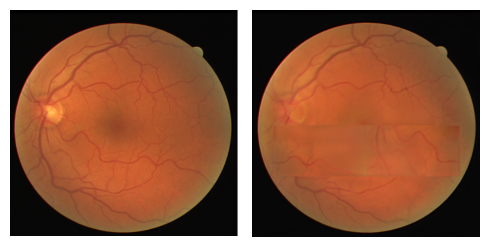

In [ ]:
images1 = mpimg.imread("/content/drive/MyDrive/testing/2_2.png")
images2 = mpimg.imread("/content/drive/MyDrive/testing/2_1.png")
real = mpimg.imread("/content/drive/MyDrive/testing/2_2.png")
generated = mpimg.imread("/content/drive/MyDrive/testing/2_1.png")
print('Prepared', images1.shape, images2.shape)
images1 = numpy.array(images1.astype('float32'))
images2 = numpy.array(images2.astype('float32'))
images1 = scale_images(images1, (256,256,3))
images2 = scale_images(images2, (256,256,3))
print('Scaled', images1.shape, images2.shape)
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
mod = InceptionV3(include_top=False, pooling='avg', input_shape=(256,256,3))
fid = calculate_fid(mod, images1, images2, real, generated)